In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [38]:
from matplotlib import rcParams
#IEEE Times New Roman (Nimbus Roman)
rcParams['text.latex.preamble'] = r"\usepackage{mathptmx}"

#Latex in general
rcParams['font.family'] = "serif"
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

## Create pickle for plot

In [4]:
result_dir = os.listdir("/home/det_user/dmarkudova/RL_rtc/output_mp/")
big_list_results = []

for filename in result_dir:
    
    # if (not "reward_profile" in filename) or (not "seed" in filename):
    #     continue
    # if ("big_trace2" in filename) or (not "seed_22" in filename):
    #     continue
    if ("big_trace2" in filename):
        continue
    
    pickle_path = "../output_mp/" + filename
    l_rate = pd.read_pickle(pickle_path)
    conf_name = pickle_path.split("/")[2].split(".")[0][17:]
    if "big_trace2" in pickle_path:
        trace_name = "./big_trace/big_trace2.json"
    else:
        trace_name = "./traces/" + pickle_path.split("_")[5] + "_" + pickle_path.split("_")[6] + ".json"
    
    d_splitted = conf_name.split("_")
    alg = d_splitted[0]
    step_time = int(d_splitted[3])
    
    if "seed" in d_splitted:
        seed = int(d_splitted[15])
    else:
        seed = 0
    
    if "reward" in d_splitted: 
        reward_profile = int(d_splitted[13])
    else:
        reward_profile = 0
    
    if d_splitted[5] == "True":
        delay_states = True
    else:
        delay_states = False
    if d_splitted[8] == "True":
        normalize_states = True
    else:
        normalize_states = False
    if d_splitted[10].split(".")[0] == "True":
        tuned = True
    else:
        tuned = False
        
    if normalize_states == False:
        continue
    
    avg_reward_list = []
    cum_reward_list = []
    for i in range(15):
        if i in l_rate[trace_name].keys():
            reward_series = pd.Series(l_rate[trace_name][i]["reward"])
            avg_reward_list.append(reward_series.mean())
            cum_reward_list.append(reward_series.sum())
    
    d_final = {
         'trace': trace_name.split("/")[2].split(".")[0],
         'delay_states': delay_states,
         'normalize_states': normalize_states,
         'step_time': step_time,
         'alg': alg,
         'tuned': tuned,
         'last_cum_reward': cum_reward_list[-1],
         'last_avg_reward': avg_reward_list[-1],
         'cum_reward_list': cum_reward_list,
         'avg_reward_list': avg_reward_list,
         'name': conf_name,
         'reward_profile': reward_profile,
         'seed': seed,
        }
    
    big_list_results.append(d_final)

In [5]:
df = pd.DataFrame(big_list_results)
df

,trace,delay_states,normalize_states,step_time,alg,tuned,last_cum_reward,last_avg_reward,cum_reward_list,avg_reward_list,name,reward_profile,seed
0,4G_3mbps,False,True,400,TD3,True,-80.495069,-0.526112,"[-82.89147700000001, -72.38274, -70.8922977, -...","[-0.5417743594771243, -0.4730898039215687, -0....",TD3_4G_3mbps_400_delay_False_norm_states_True_...,0,0
1,5G_13mbps,False,True,200,TD3,False,-43.209139,-0.142135,"[-44.765443899999994, -50.7771878, -38.8453823...","[-0.14725474967105265, -0.16703022302631573, -...",TD3_5G_13mbps_200_delay_False_norm_states_True...,0,22
2,WIRED_200kbps,False,True,400,SAC,False,205.404080,0.368108,"[204.12852, 136.8304, 135.86536, 121.205080000...","[0.36582172043010697, 0.24521577060931893, 0.2...",SAC_WIRED_200kbps_400_delay_False_norm_states_...,0,0
3,WIRED_900kbps,False,True,400,SAC,True,75.290240,0.519243,"[63.150600000000004, 67.36788000000001, 63.466...","[0.4355213793103449, 0.46460606896551754, 0.43...",SAC_WIRED_900kbps_400_delay_False_norm_states_...,0,0
4,4G_700kbps,False,True,400,TD3,True,39.898680,0.149433,"[-10.7584, 29.9526, 21.988360000000007, 31.932...","[-0.040293632958801506, 0.11218202247191007, 0...",TD3_4G_700kbps_400_delay_False_norm_states_Tru...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,WIRED_35mbps,True,True,200,TD3,False,-15.419165,-0.050225,"[-15.4020051, -15.5979967, -14.417606799999998...","[-0.05016939771986972, -0.05080780684039084, -...",TD3_WIRED_35mbps_200_delay_True_norm_states_Tr...,0,0
438,4G_700kbps,True,True,600,SAC,True,19.090760,0.107251,"[20.838880000000003, 18.667720000000003, 15.73...","[0.11707235955056189, 0.10487483146067414, 0.0...",SAC_4G_700kbps_600_delay_True_norm_states_True...,0,0
439,WIRED_200kbps,False,True,200,TD3,False,138.367600,0.124097,"[202.76868000000002, 249.86560000000003, 277.9...","[0.18185531838565003, 0.22409470852017943, 0.2...",TD3_WIRED_200kbps_200_delay_False_norm_states_...,1,36
440,4G_500kbps,True,True,200,SAC,True,45.528148,0.085740,"[44.60854055623731, 28.418914061476695, 29.030...","[0.08400855095336604, 0.05351961216850599, 0.0...",SAC_4G_500kbps_200_delay_True_norm_states_True...,0,22


## Find best algorithm conf

In [6]:
trace = "WIRED_900kbps"
dff = df[(df.trace == trace) \
    & (df.reward_profile == 0) \
    & (df.step_time == 200) \
   # & (df.alg == "PPO") \
    & (df.seed == 0)
                     ]
dff

,trace,delay_states,normalize_states,step_time,alg,tuned,last_cum_reward,last_avg_reward,cum_reward_list,avg_reward_list,name,reward_profile,seed
32,WIRED_900kbps,True,True,200,TD3,False,141.16612,0.488464,"[126.36272, 134.50560000000002, 140.9443600000...","[0.43724124567474043, 0.46541730103806245, 0.4...",TD3_WIRED_900kbps_200_delay_True_norm_states_T...,0,0
45,WIRED_900kbps,True,True,200,TD3,True,148.31552,0.513202,"[-5.7461199999999995, 118.79024000000001, 121....","[-0.019882768166089953, 0.41103889273356414, 0...",TD3_WIRED_900kbps_200_delay_True_norm_states_T...,0,0
72,WIRED_900kbps,False,True,200,SAC,False,124.95408,0.432367,"[38.024, 64.68448000000001, 85.78316000000001,...","[0.13157093425605532, 0.2238217301038062, 0.29...",SAC_WIRED_900kbps_200_delay_False_norm_states_...,0,0
89,WIRED_900kbps,True,True,200,PPO,True,-14.98020,-0.051835,"[-14.980200000000004, -14.980200000000004, -14...","[-0.05183460207612455, -0.05183460207612455, -...",PPO_WIRED_900kbps_200_delay_True_norm_states_T...,0,0
161,WIRED_900kbps,False,True,200,SAC,True,112.96460,0.390881,"[109.04176000000001, 131.26384, 140.14704, 119...","[0.3773071280276816, 0.45420013840830475, 0.48...",SAC_WIRED_900kbps_200_delay_False_norm_states_...,0,0
166,WIRED_900kbps,False,True,200,SAC,True,147.60740,0.510752,"[122.12528, 123.54420000000002, 127.32828, 126...","[0.4225788235294119, 0.42748858131487866, 0.44...",SAC_WIRED_900kbps_200_delay_False_norm_states_...,0,0
218,WIRED_900kbps,True,True,200,PPO,False,-14.98020,-0.051835,"[-14.980200000000004, -14.980200000000004, -14...","[-0.05183460207612455, -0.05183460207612455, -...",PPO_WIRED_900kbps_200_delay_True_norm_states_T...,0,0
233,WIRED_900kbps,True,True,200,SAC,False,111.65256,0.386341,"[71.54260000000001, 108.57400000000001, 107.89...","[0.2475522491349481, 0.3756885813148791, 0.373...",SAC_WIRED_900kbps_200_delay_True_norm_states_T...,0,0
268,WIRED_900kbps,False,True,200,TD3,True,138.25712,0.478398,"[-14.992600000000003, 131.00904000000003, 122....","[-0.05187750865051901, 0.45331847750865023, 0....",TD3_WIRED_900kbps_200_delay_False_norm_states_...,0,0
272,WIRED_900kbps,False,True,200,PPO,False,-14.98020,-0.051835,"[-14.980200000000004, -14.980200000000004, -14...","[-0.05183460207612455, -0.05183460207612455, -...",PPO_WIRED_900kbps_200_delay_False_norm_states_...,0,0


In [17]:
import itertools

In [19]:
dff = df[((df.trace == "4G_700kbps") & \
                  (df.last_cum_reward > 0) & \
                 (df.step_time == 200) & \
                  (df.reward_profile == 0) & \
                  (df.seed == 0) & \
                 (df.tuned == True))
                ]
dff

,trace,delay_states,normalize_states,step_time,alg,tuned,last_cum_reward,last_avg_reward,cum_reward_list,avg_reward_list,name,reward_profile,seed
46,4G_700kbps,False,True,200,TD3,True,76.50900,0.143275,"[-0.17272000000000154, 57.59024, 82.45944, 60....","[-0.00032344569288388905, 0.10784689138576786,...",TD3_4G_700kbps_200_delay_False_norm_states_Tru...,0,0
68,4G_700kbps,True,True,200,SAC,True,87.73832,0.164304,"[49.33860000000001, 68.91236, 49.4402000000000...","[0.09239438202247192, 0.12904936329588015, 0.0...",SAC_4G_700kbps_200_delay_True_norm_states_True...,0,0
170,4G_700kbps,True,True,200,TD3,True,101.97628,0.190967,"[24.73576, 69.70612000000001, 82.76232, 81.217...","[0.04632164794007491, 0.13053580524344563, 0.1...",TD3_4G_700kbps_200_delay_True_norm_states_True...,0,0
286,4G_700kbps,False,True,200,SAC,True,47.59648,0.089132,"[67.93524, 44.22632, 61.43112000000001, 54.796...","[0.1272195505617978, 0.0828208239700375, 0.115...",SAC_4G_700kbps_200_delay_False_norm_states_Tru...,0,0
336,4G_700kbps,False,True,200,TD3,True,96.69288,0.181073,"[-20.80708, 63.63140000000001, 62.396960000000...","[-0.03896456928838953, 0.11915992509363306, 0....",TD3_4G_700kbps_200_delay_False_norm_states_Tru...,0,0


In [30]:
# df_for_plot = dff.loc[[170, 336, 68, 286]]
# df_for_plot.to_pickle("df_for_validation_plot.pickle")

## Make plot by reading pickle

In [39]:
df_for_plot = pd.read_pickle("df_for_validation_plot.pickle")

In [40]:
dict_names = {
"TD3_4G_700kbps_200_delay_False_norm_states_True_tuned_True": "TD3, not delayed, tuned",
"SAC_4G_700kbps_200_delay_True_norm_states_True_tuned_True": "SAC, delayed, tuned",
"TD3_4G_700kbps_200_delay_True_norm_states_True_tuned_True": "TD3, delayed, tuned",
"SAC_4G_700kbps_200_delay_False_norm_states_True_tuned_True": "SAC, not delayed, tuned",
}

In [48]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [60]:
[f"{i}k" for i in range(10,110, 10)]

['10k', '20k', '30k', '40k', '50k', '60k', '70k', '80k', '90k', '100k']

## TODO: Make this plot as average over 3 runs with diff random seeds

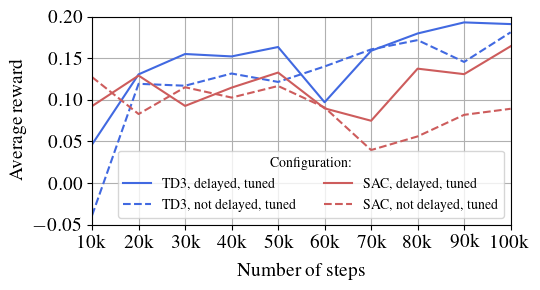

In [73]:
linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
ls1 = itertools.cycle(linestyles)
ls2 = itertools.cycle(linestyles)
fontsize = 14

plt.figure(figsize=(5.5,3))
for i, row in df_for_plot.iterrows():
    name = row["name"]
    data = row.avg_reward_list
    if "SAC" in name:
        plt.plot(data, label=dict_names[name], color="indianred", ls=next(ls1))
    else:
        plt.plot(data, label=dict_names[name], color="royalblue", ls=next(ls2))
    plt.xticks(range(0,10), [f"{i}k" for i in range(10,110, 10)], fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xlim(-0.2, 9.2)
    plt.xlim(0, 9)
    plt.ylim(-0.05, 0.20)
    plt.xlabel("Number of steps", labelpad=8, fontsize=fontsize)
    plt.ylabel("Average reward", fontsize=fontsize)
    
plt.grid()
plt.legend(loc="lower right", ncol=2, title="Configuration:", fontsize=10)
plt.tight_layout()
plt.savefig("plots/validation_example.pdf")

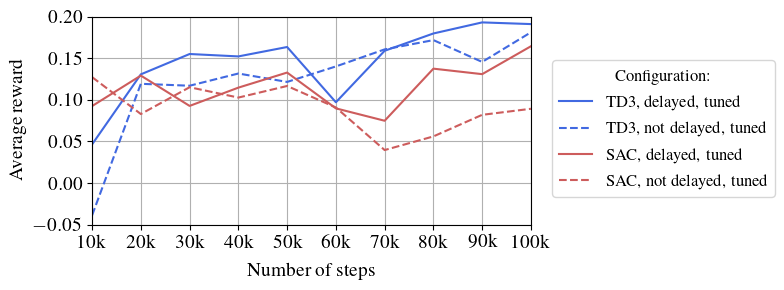

In [89]:
linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
ls1 = itertools.cycle(linestyles)
ls2 = itertools.cycle(linestyles)
fontsize = 14

plt.figure(figsize=(8,3))
for i, row in df_for_plot.iterrows():
    name = row["name"]
    data = row.avg_reward_list
    if "SAC" in name:
        plt.plot(data, label=dict_names[name], color="indianred", ls=next(ls1))
    else:
        plt.plot(data, label=dict_names[name], color="royalblue", ls=next(ls2))
    plt.xticks(range(0,10), [f"{i}k" for i in range(10,110, 10)], fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xlim(-0.2, 9.2)
    plt.xlim(0, 9)
    plt.ylim(-0.05, 0.20)
    plt.xlabel("Number of steps", labelpad=8, fontsize=fontsize)
    plt.ylabel("Average reward", fontsize=fontsize)
    
plt.grid()
# plt.legend(loc="lower right", ncol=2, title="Configuration:", fontsize=10)
legend = plt.legend(title="Configuration:", bbox_to_anchor=(1.03,0.83), fontsize=12)
plt.setp(legend.get_title(),fontsize=12)
plt.tight_layout()

plt.savefig("plots/validation_example.pdf", bbox_inches='tight')

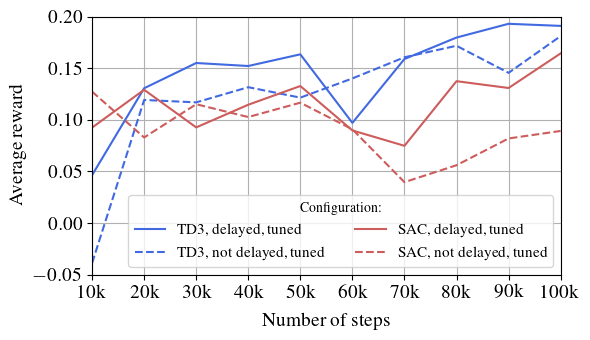

In [98]:
linestyles = ["solid", "dashed", "dotted", "dashdot", (0, (3, 1, 1, 1))]
ls1 = itertools.cycle(linestyles)
ls2 = itertools.cycle(linestyles)
fontsize = 14

plt.figure(figsize=(6,3.5))
for i, row in df_for_plot.iterrows():
    name = row["name"]
    data = row.avg_reward_list
    if "SAC" in name:
        plt.plot(data, label=dict_names[name], color="indianred", ls=next(ls1))
    else:
        plt.plot(data, label=dict_names[name], color="royalblue", ls=next(ls2))
    plt.xticks(range(0,10), [f"{i}k" for i in range(10,110, 10)], fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.xlim(-0.2, 9.2)
    plt.xlim(0, 9)
    plt.ylim(-0.05, 0.20)
    plt.xlabel("Number of steps", labelpad=8, fontsize=fontsize)
    plt.ylabel("Average reward", fontsize=fontsize)
    
plt.grid()
plt.legend(loc="lower right", ncol=2, title="Configuration:", fontsize=11)
# legend = plt.legend(title="Configuration:", bbox_to_anchor=(1.03,0.83), fontsize=12)
plt.setp(legend.get_title(),fontsize=12)
plt.tight_layout()

plt.savefig("plots/validation_example.pdf", bbox_inches='tight')